In [54]:
import pandas as pd 
import matplotlib as plt 
import numpy as np
import matplotlib.pyplot as plt  #importing the required packages

In [55]:
apprenticeships = pd.read_csv("C:/Users/asus/Documents/Data Projects/apprenticeships-and-traineeships_2022-23/data/Cleaned Data/Total Apprenticeship Time Series.csv")

In [56]:
apprenticeships.head() #view the data

,time_period,time_identifier,geographic_level,country_code,country_name,apps_all,app_intermediate,app_advanced,app_higher
0,2005,Academic year,National,E92000001,England,"403,000",z,z,z
1,2006,Academic year,National,E92000001,England,"388,000",z,z,z
2,2007,Academic year,National,E92000001,England,"418,900",z,z,z
3,2008,Academic year,National,E92000001,England,"444,800",z,z,z
4,2009,Academic year,National,E92000001,England,"491,300",z,z,z


In [57]:
apprenticeships.replace('z', pd.NA, inplace=True) 
print(apprenticeships) #replacing 'Z' with NaN as these represent nulls

    time_period time_identifier geographic_level country_code country_name  \
0          2005   Academic year         National    E92000001      England   
1          2006   Academic year         National    E92000001      England   
2          2007   Academic year         National    E92000001      England   
3          2008   Academic year         National    E92000001      England   
4          2009   Academic year         National    E92000001      England   
5          2010   Academic year         National    E92000001      England   
6          2011   Academic year         National    E92000001      England   
7          2012   Academic year         National    E92000001      England   
8          2013   Academic year         National    E92000001      England   
9          2014   Academic year         National    E92000001      England   
10         2015   Academic year         National    E92000001      England   
11         2016   Academic year         National    E92000001   

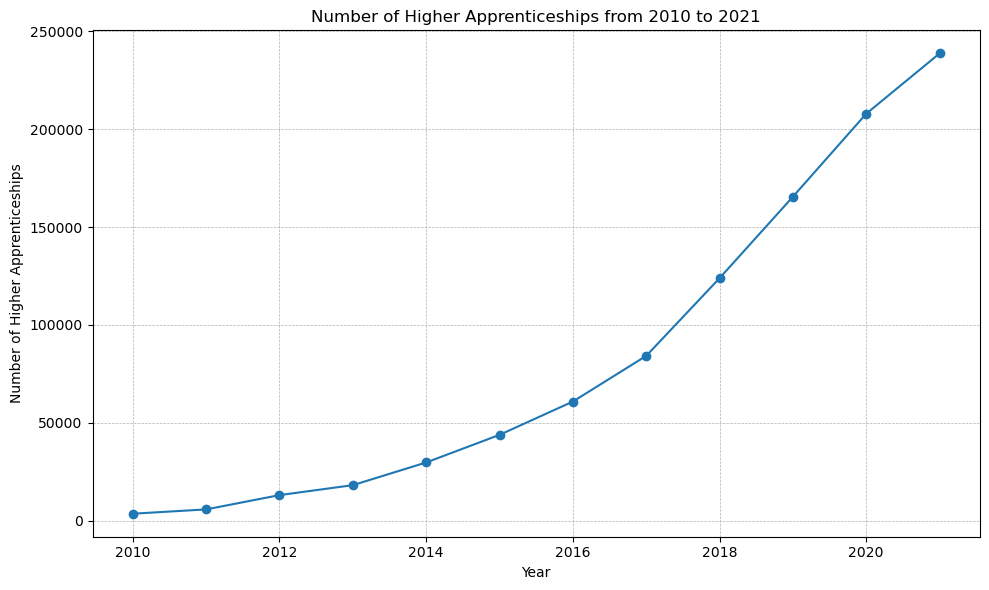

In [145]:
plt.figure(figsize=(10,6))
plt.plot(apprenticeships['time_period'], apprenticeships['app_higher'], marker='o')
plt.title('Number of Higher Apprenticeships from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Higher Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show() 

#line chart 

<Figure size 1200x700 with 0 Axes>

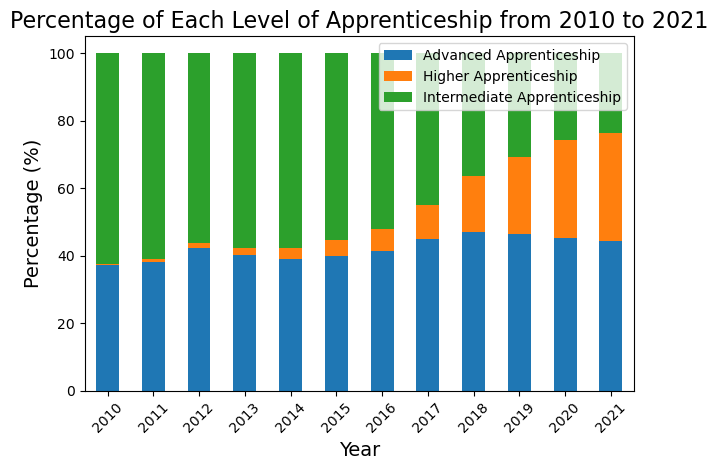

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "apprenticeships"

# Convert 'time_period' to datetime format
apprenticeships['time_period'] = pd.to_datetime(apprenticeships['time_period'], format='%Y')

# Filter data for the relevant years
filtered_data = apprenticeships[(apprenticeships['time_period'].dt.year >= 2010) & (apprenticeships['time_period'].dt.year <= 2021)]

# Pivot the data to get the counts of each level for each year
pivot_data = filtered_data.pivot_table(index=filtered_data['time_period'].dt.year, values=['app_intermediate', 'app_advanced', 'app_higher'], aggfunc='sum', fill_value=0)

# Calculate the total for each year
pivot_data['Total'] = pivot_data.sum(axis=1)

# Calculate the percentage of each level for each year
percentage_data = pivot_data.div(pivot_data['Total'], axis=0) * 100

# Plotting
plt.figure(figsize=(12, 7))
ax = percentage_data.drop(columns='Total').plot(kind='bar', stacked=True)

# Customizing legend labels
ax.legend(['Advanced Apprenticeship', 'Higher Apprenticeship', 'Intermediate Apprenticeship'])

# Adding title and labels
plt.title('Percentage of Each Level of Apprenticeship from 2010 to 2021', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [58]:
apprenticeships.dropna(inplace=True) #dropping Na's

In [59]:
apprenticeships['apps_all'] = apprenticeships['apps_all'].str.replace(',', '').astype(int) #removing commas from the numbers and setting as type INT

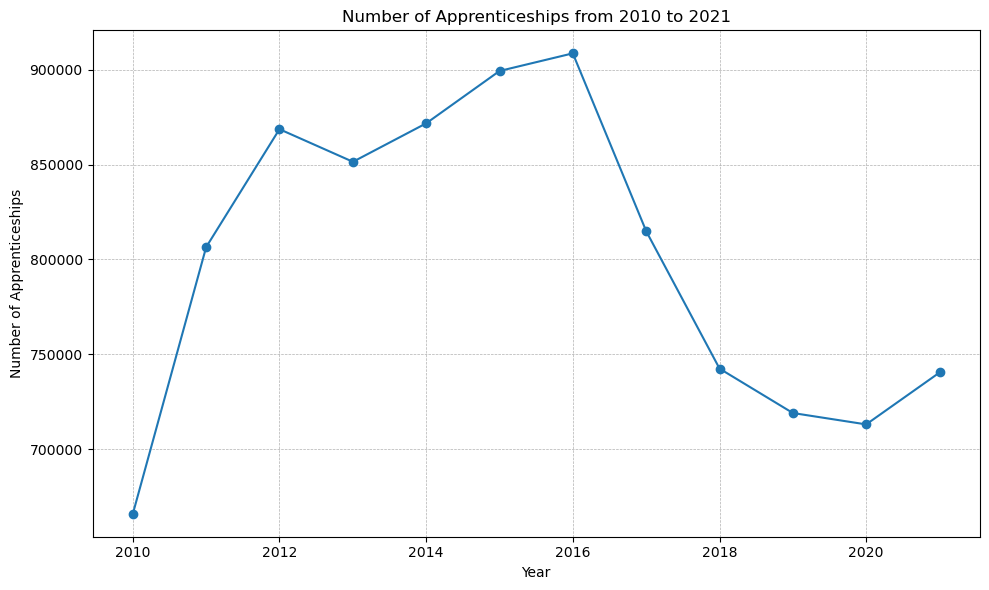

In [138]:
plt.figure(figsize=(10,6))
plt.plot(apprenticeships['time_period'], apprenticeships['apps_all'], marker='o')
plt.title('Number of Apprenticeships from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show() 

#line chart 

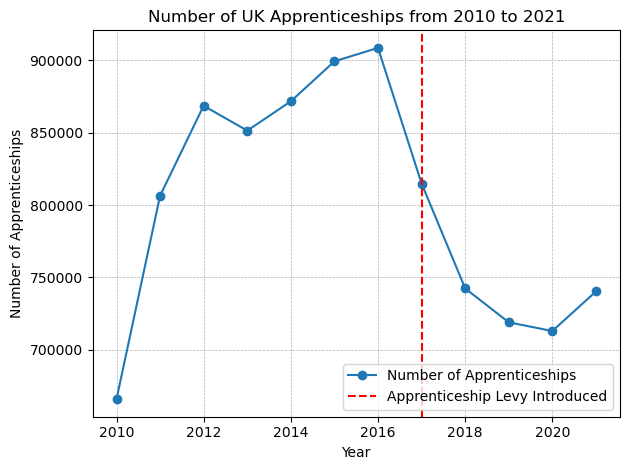

In [140]:
# Plot the line data with zorder=1
plt.plot(apprenticeships['time_period'], apprenticeships['apps_all'], marker='o', label='Number of Apprenticeships')

# Add a vertical reference line for the year 2017 (apprenticeship levy introduced) with zorder=2
plt.axvline(x=pd.to_datetime('2017'), color='red', linestyle='--', label='Apprenticeship Levy Introduced', zorder=2)

plt.title('Number of UK Apprenticeships from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Add a legend
plt.legend()

plt.show()

In [61]:
apprenticeships['app_intermediate'] = pd.to_numeric(apprenticeships['app_intermediate'].str.replace(',', ''), errors='coerce')
apprenticeships['app_advanced'] = pd.to_numeric(apprenticeships['app_advanced'].str.replace(',', ''), errors='coerce')
apprenticeships['app_higher'] = pd.to_numeric(apprenticeships['app_higher'].str.replace(',', ''), errors='coerce')


In [62]:
apprenticeships.info

<bound method DataFrame.info of     time_period time_identifier geographic_level country_code country_name  \
5          2010   Academic year         National    E92000001      England   
6          2011   Academic year         National    E92000001      England   
7          2012   Academic year         National    E92000001      England   
8          2013   Academic year         National    E92000001      England   
9          2014   Academic year         National    E92000001      England   
10         2015   Academic year         National    E92000001      England   
11         2016   Academic year         National    E92000001      England   
12         2017   Academic year         National    E92000001      England   
13         2018   Academic year         National    E92000001      England   
14         2019   Academic year         National    E92000001      England   
15         2020   Academic year         National    E92000001      England   
16         2021   Academic year 

In [63]:
apprenticeships.dtypes

time_period          int64
time_identifier     object
geographic_level    object
country_code        object
country_name        object
apps_all             int32
app_intermediate     int64
app_advanced         int64
app_higher           int64
dtype: object

In [64]:
print(apprenticeships.dtypes)


time_period          int64
time_identifier     object
geographic_level    object
country_code        object
country_name        object
apps_all             int32
app_intermediate     int64
app_advanced         int64
app_higher           int64
dtype: object


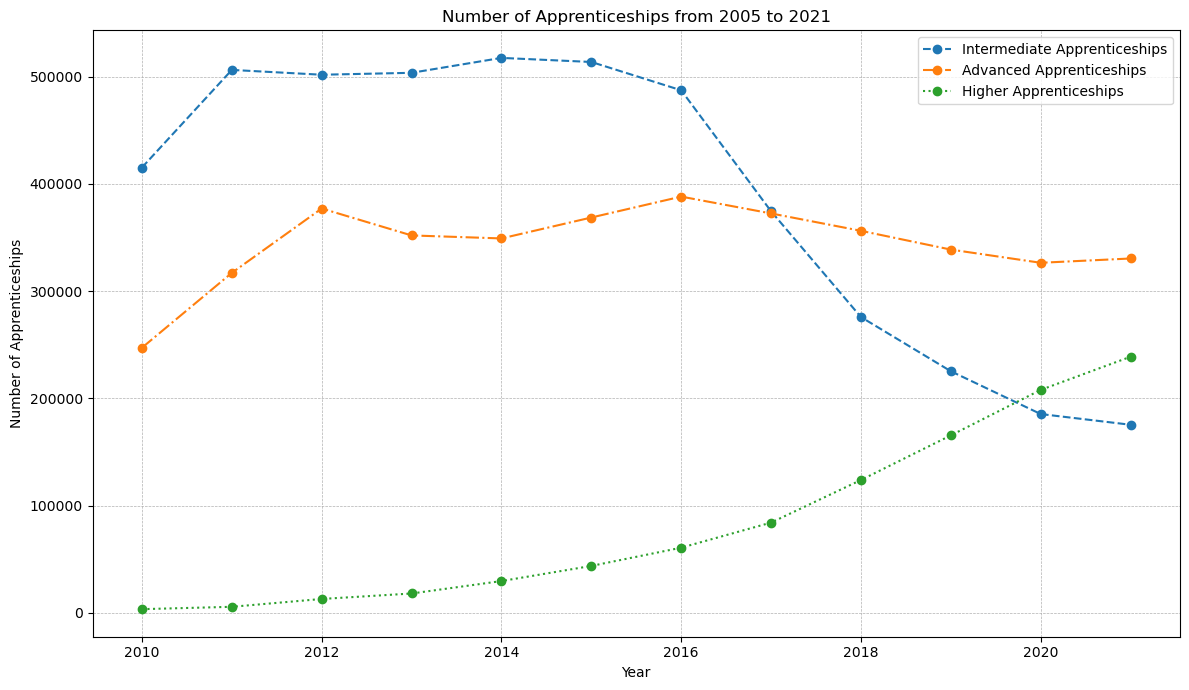

In [65]:
filtered_apprenticeships = apprenticeships[(apprenticeships['time_period'] >= 2005) & (apprenticeships['time_period'] <= 2021)]

# Plot
plt.figure(figsize=(12, 7))

# Plotting each line
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_intermediate'], marker='o', linestyle='--', label='Intermediate Apprenticeships')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_advanced'], marker='o', linestyle='-.', label='Advanced Apprenticeships')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_higher'], marker='o', linestyle=':', label='Higher Apprenticeships')

# Adding title, labels, and legend
plt.title('Number of Apprenticeships from 2005 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

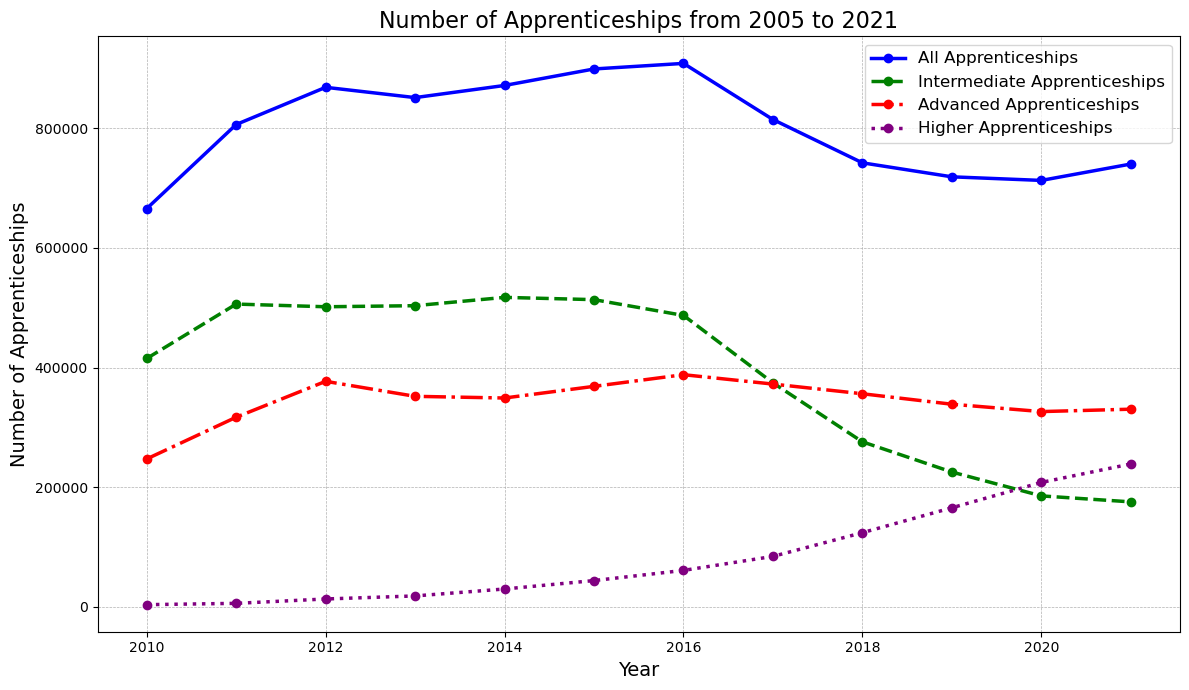

In [66]:
iltered_apprenticeships = apprenticeships[(apprenticeships['time_period'] >= 2005) & (apprenticeships['time_period'] <= 2021)]

# Plot
plt.figure(figsize=(12, 7))

# Define line widths for each series
line_width = 2.5

# Plotting each line with thicker lines
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['apps_all'], marker='o', label='All Apprenticeships', linewidth=line_width, color='blue')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_intermediate'], marker='o', linestyle='--', label='Intermediate Apprenticeships', linewidth=line_width, color='green')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_advanced'], marker='o', linestyle='-.', label='Advanced Apprenticeships', linewidth=line_width, color='red')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_higher'], marker='o', linestyle=':', label='Higher Apprenticeships', linewidth=line_width, color='purple')

# Adding title, labels, and legend
plt.title('Number of Apprenticeships from 2005 to 2021', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Apprenticeships', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [67]:
apprenticeships1 = pd.read_csv("C:\\Users\\asus\\Documents\\Data Projects\\apprenticeships-and-traineeships_2022-23\\data\\Cleaned Data\\Apprenticeship Deprivation Analysis.csv")

In [68]:
apprenticeships1.head()

,time_period,stem,level,detailed_level,age_youth_adult,age_group,learner_home_depriv,leavers,achievers,retention_rate,pass_rate,achievement_rate
0,201920,Total,Total,Total,Total,Total,Total,270470,155440,58.7,97.9,57.5
1,201920,Total,Total,Total,Total,Total,One (most deprived),60930,32160,54.1,97.6,52.8
2,201920,Total,Total,Total,Total,Total,Two,56520,30850,56,97.5,54.6
3,201920,Total,Total,Total,Total,Total,Three,54940,32370,60.1,98,58.9
4,201920,Total,Total,Total,Total,Total,Four,51660,31330,61.7,98.3,60.7


In [69]:
import matplotlib.pyplot as plt


In [71]:
print(apprenticeships1['achievers'].dtype)

object


In [72]:
# Replacing commas and converting to numeric
apprenticeships1['achievers'] = pd.to_numeric(apprenticeships1['achievers'].str.replace(',', ''), errors='coerce')


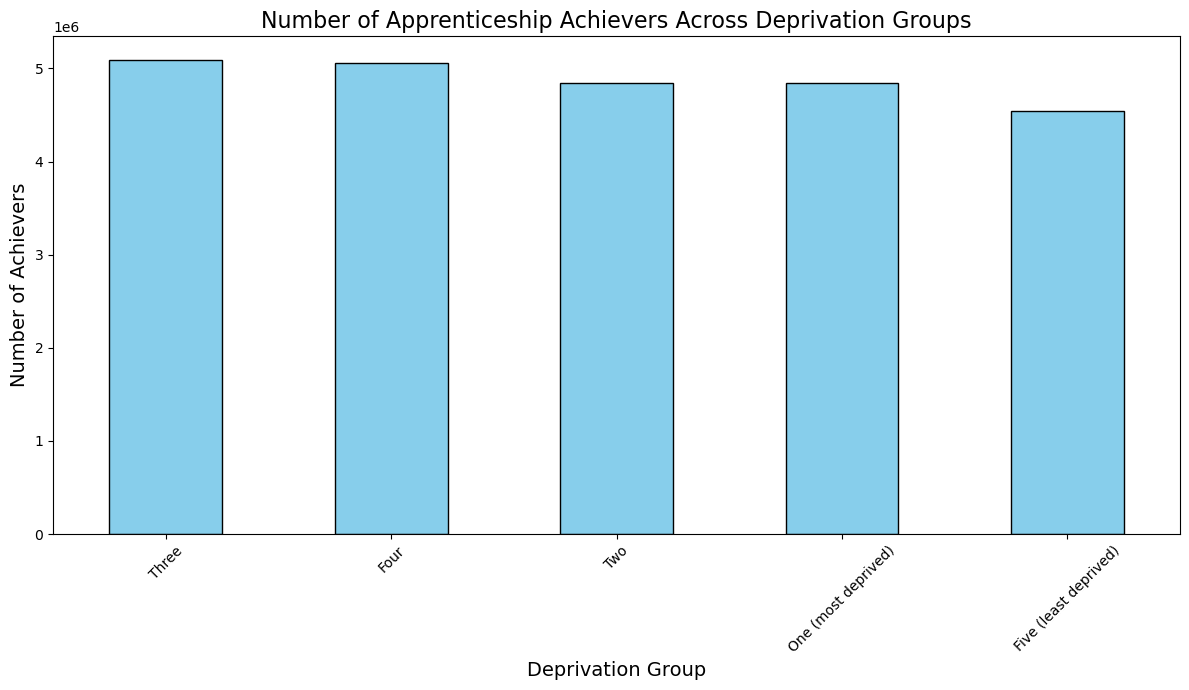

In [143]:
import matplotlib.pyplot as plt

# Filter out 'Total' and 'Unknown' deprivation groups
filtered_data = apprenticeships1[~apprenticeships1['learner_home_depriv'].isin(['Total', 'Unknown'])]

# Grouping data by 'learner_home_depriv' and summing up the 'achievers'
grouped_data = filtered_data.groupby('learner_home_depriv')['achievers'].sum()

# Sort the grouped data in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Number of Apprenticeship Achievers Across Deprivation Groups', fontsize=16)
plt.xlabel('Deprivation Group', fontsize=14)
plt.ylabel('Number of Achievers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [76]:
print(apprenticeships1['stem'].unique())


['Total' 'STEM - yes' 'STEM - no']


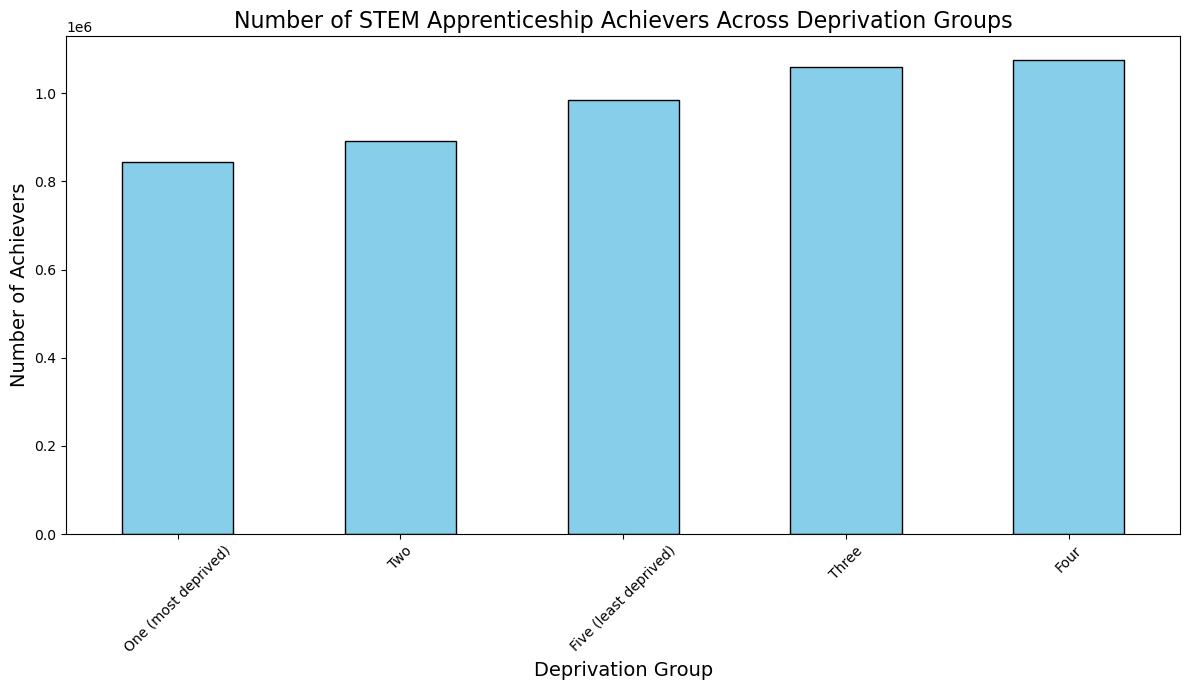

In [78]:
import matplotlib.pyplot as plt

# Filter the dataframe for rows where the 'stem' column indicates STEM subjects
stem_data = apprenticeships1[apprenticeships1['stem'] == 'STEM - yes']

# Further filter out 'Total' and 'Unknown' deprivation groups
filtered_stem_data = stem_data[~stem_data['learner_home_depriv'].isin(['Total', 'Unknown'])]

# Grouping data by 'learner_home_depriv' and summing up the 'achievers'
grouped_data = filtered_stem_data.groupby('learner_home_depriv')['achievers'].sum()

# Sort the data by the number of achievers
sorted_grouped_data = grouped_data.sort_values()

# Plotting
plt.figure(figsize=(12, 7))
sorted_grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Number of STEM Apprenticeship Achievers Across Deprivation Groups', fontsize=16)
plt.xlabel('Deprivation Group', fontsize=14)
plt.ylabel('Number of Achievers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [79]:
apprenticeshipsmap = pd.read_csv("C:\\Users\asus\Documents\\Data Projects\\apprenticeships-and-traineeships_2022-23\\data\\app-geography-detailed-202223-q2.csv")

OSError: [Errno 22] Invalid argument: 'C:\\Users\x07sus\\Documents\\Data Projects\\apprenticeships-and-traineeships_2022-23\\data\\app-geography-detailed-202223-q2.csv'

In [80]:
apprenticeshipsmap = pd.read_csv(r"C:\Users\asus\Documents\Data Projects\apprenticeships-and-traineeships_2022-23\data\app-


SyntaxError: unterminated string literal (detected at line 1) (2457218487.py, line 1)

In [81]:
apprenticeshipsmap = pd.read_csv(r"C:\Users\asus\Documents\Data Projects\apprenticeships-and-traineeships_2022-23\data\app-geography-detailed-202223-q2.csv")


In [82]:
apprenticeshipsmap.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
0,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000009,Trafford,Information and Communication Technology,Total,Black/African/Caribbean/Black British,Intermediate Apprenticeship,low,low
1,202223,Academic year,Local authority district,E92000001,England,E12000007,London,E09000002,Barking and Dagenham,Engineering and Manufacturing Technologies,Total,White,Total,40,10
2,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000113,Swale,Engineering and Manufacturing Technologies,Male,Total,Higher Apprenticeship,low,low
3,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000223,Adur,Information and Communication Technology,Female,Black/African/Caribbean/Black British,Total,low,low
4,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E06000021,Stoke-on-Trent,Education and Training,Male,White,Advanced Apprenticeship,10,low


In [85]:
apprenticeshipsmap['achievements'] = apprenticeshipsmap['achievements'].replace('low', 5)

# Convert the column to numeric values
apprenticeshipsmap['achievements'] = pd.to_numeric(apprenticeshipsmap['achievements'])


TypeError: 'value' must be an instance of str or bytes, not a float

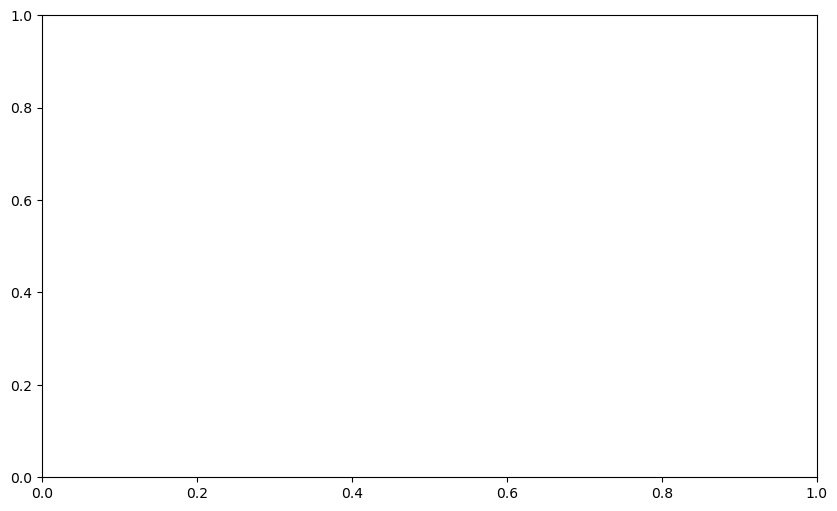

In [88]:

apprenticeshipsmap = apprenticeshipsmap.sort_values(by="achievements", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(apprenticeshipsmap["lad_name"], apprenticeshipsmap["achievements"], color="blue")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Locations with Highest Achievements")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

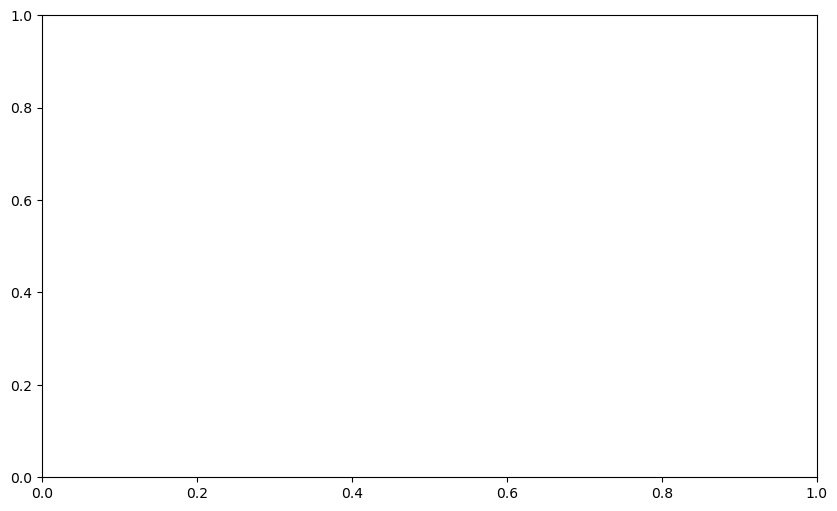

In [89]:
# Assuming your DataFrame is named "apprenticeshipsmap"

# Convert 'low' values to 5 in the 'achievements' column
apprenticeshipsmap.loc[apprenticeshipsmap['achievements'] == 'low', 'achievements'] = 5

# Convert the column to numeric values
apprenticeshipsmap['achievements'] = pd.to_numeric(apprenticeshipsmap['achievements'])

# Now create the bar chart
import matplotlib.pyplot as plt

apprenticeshipsmap = apprenticeshipsmap.sort_values(by="achievements", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(apprenticeshipsmap["lad_name"], apprenticeshipsmap["achievements"], color="blue")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Locations with Highest Achievements")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [92]:
apprenticeshipsmap.dropna()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
115117,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000035,Leeds,Total,Total,Total,Total,2970,1030
275313,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E08000025,Birmingham,Total,Total,Total,Total,3190,1010
256687,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E06000054,Wiltshire,Total,Total,Total,Total,2380,1000
5009,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E06000054,Wiltshire,Total,Total,White,Total,2160,890
259126,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000035,Leeds,Total,Total,White,Total,2480,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147452,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000091,New Forest,Information and Communication Technology,Female,Other ethnic group,Intermediate Apprenticeship,low,5
147453,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000013,St. Helens,"Construction, Planning and the Built Environment",Male,Other ethnic group,Total,low,5
147327,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E06000060,Buckinghamshire,Engineering and Manufacturing Technologies,Female,Mixed/Multiple ethnic groups,Advanced Apprenticeship,low,5
147393,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000002,Bury,"Construction, Planning and the Built Environment",Total,Black/African/Caribbean/Black British,Intermediate Apprenticeship,low,5


TypeError: 'value' must be an instance of str or bytes, not a float

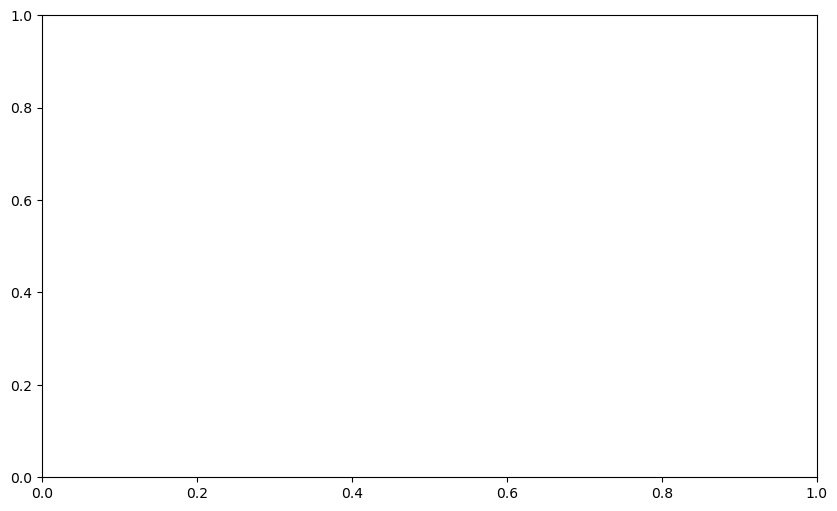

In [93]:
apprenticeshipsmap = apprenticeshipsmap.sort_values(by="achievements", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(apprenticeshipsmap["lad_name"], apprenticeshipsmap["achievements"], color="blue")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Locations with Highest Achievements")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

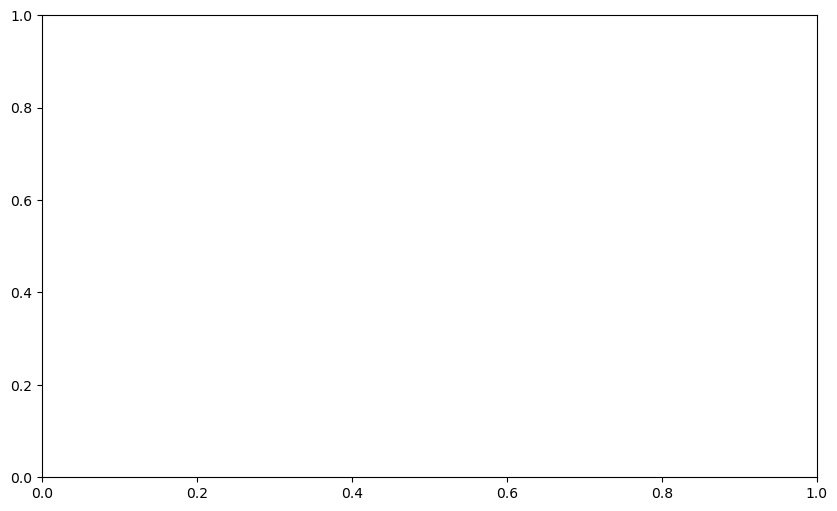

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "apprenticeshipsmap"
# Convert 'low' values to 5 in the 'achievements' column
apprenticeshipsmap['achievements'] = apprenticeshipsmap['achievements'].replace('low', 5)

# Convert the column to numeric values
apprenticeshipsmap['achievements'] = pd.to_numeric(apprenticeshipsmap['achievements'])

# Now create the bar chart
apprenticeshipsmap = apprenticeshipsmap.sort_values(by="achievements", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(apprenticeshipsmap["lad_name"], apprenticeshipsmap["achievements"], color="blue")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Locations with Highest Achievements")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [96]:
apprenticeshipsmap.head(100)

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
193480,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Total,195600,62030
271895,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,White,Total,163840,53460
274871,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Female,Total,Total,93480,32920
170105,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Male,Total,Total,102120,29110
371246,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Advanced Apprenticeship,84650,28460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40461,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,"Health, Public Services and Care",Female,Total,Intermediate Apprenticeship,8240,3630
183863,202223,Academic year,Regional,E92000001,England,E12000003,Yorkshire and The Humber,NaN,NaN,Total,Male,Total,Total,12840,3610
252333,202223,Academic year,Regional,E92000001,England,E12000007,London,NaN,NaN,Total,Female,Total,Total,10590,3610
160802,202223,Academic year,Regional,E92000001,England,E12000009,South West,NaN,NaN,Total,Female,Total,Total,10250,3580


In [98]:
apprenticeshipsmap.dropna()
apprenticeshipsmap.head(100)

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
193480,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Total,195600,62030
271895,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,White,Total,163840,53460
274871,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Female,Total,Total,93480,32920
170105,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Male,Total,Total,102120,29110
371246,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Advanced Apprenticeship,84650,28460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40461,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,"Health, Public Services and Care",Female,Total,Intermediate Apprenticeship,8240,3630
183863,202223,Academic year,Regional,E92000001,England,E12000003,Yorkshire and The Humber,NaN,NaN,Total,Male,Total,Total,12840,3610
252333,202223,Academic year,Regional,E92000001,England,E12000007,London,NaN,NaN,Total,Female,Total,Total,10590,3610
160802,202223,Academic year,Regional,E92000001,England,E12000009,South West,NaN,NaN,Total,Female,Total,Total,10250,3580


In [99]:
apprenticeshipsmap.dropna(subset=['achievements'], inplace=True)

In [100]:
apprenticeshipsmap.head(100)

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
193480,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Total,195600,62030
271895,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,White,Total,163840,53460
274871,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Female,Total,Total,93480,32920
170105,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Male,Total,Total,102120,29110
371246,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Advanced Apprenticeship,84650,28460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40461,202223,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,"Health, Public Services and Care",Female,Total,Intermediate Apprenticeship,8240,3630
183863,202223,Academic year,Regional,E92000001,England,E12000003,Yorkshire and The Humber,NaN,NaN,Total,Male,Total,Total,12840,3610
252333,202223,Academic year,Regional,E92000001,England,E12000007,London,NaN,NaN,Total,Female,Total,Total,10590,3610
160802,202223,Academic year,Regional,E92000001,England,E12000009,South West,NaN,NaN,Total,Female,Total,Total,10250,3580


In [101]:
apprenticeshipsmap.dropna(subset=['lad_name'], inplace=True)

In [102]:
apprenticeshipsmap.head(100)

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
115117,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000035,Leeds,Total,Total,Total,Total,2970,1030
275313,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E08000025,Birmingham,Total,Total,Total,Total,3190,1010
256687,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E06000054,Wiltshire,Total,Total,Total,Total,2380,1000
5009,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E06000054,Wiltshire,Total,Total,White,Total,2160,890
259126,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000035,Leeds,Total,Total,White,Total,2480,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96193,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E07000166,Richmondshire,"Health, Public Services and Care",Male,White,Total,1060,370
362601,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000032,Bradford,Total,Female,Total,Total,1090,370
85221,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E07000040,East Devon,Total,Total,White,Total,790,370
306598,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E08000026,Coventry,Total,Total,Total,Total,1270,370


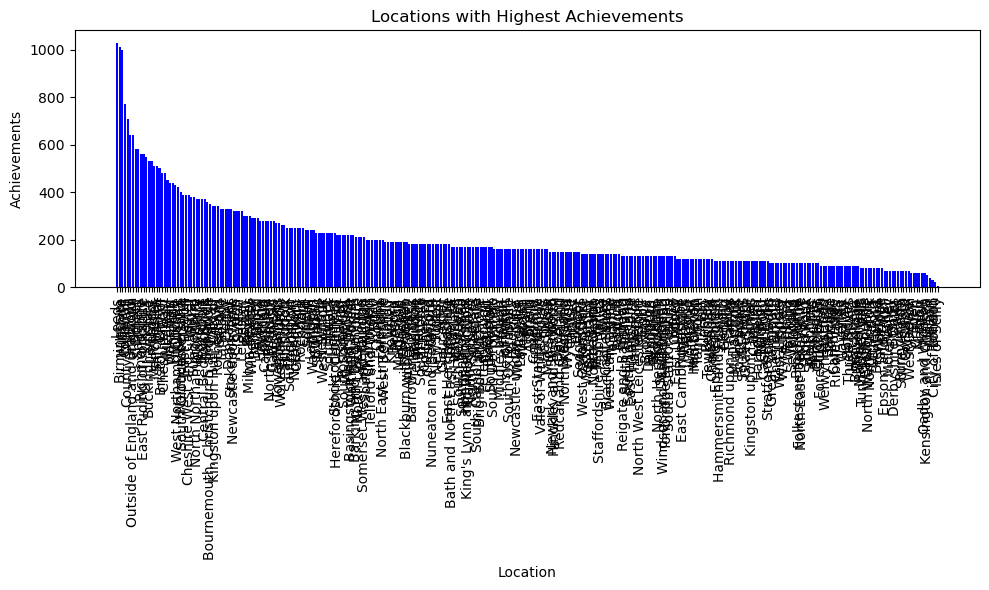

In [103]:
apprenticeshipsmap = apprenticeshipsmap.sort_values(by="achievements", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(apprenticeshipsmap["lad_name"], apprenticeshipsmap["achievements"], color="blue")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Locations with Highest Achievements")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

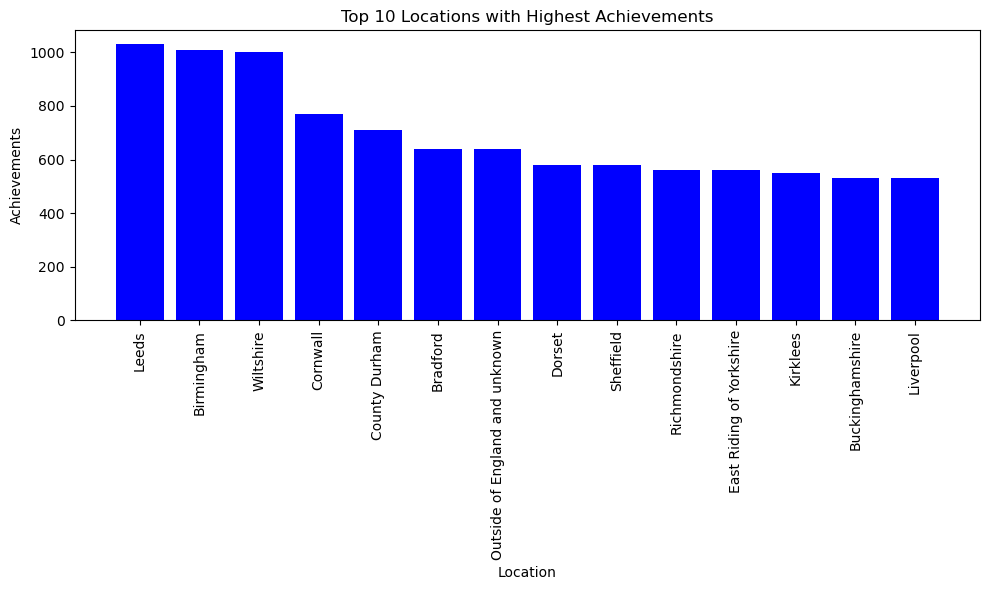

In [106]:
# Select top 10 locations with highest achievements
top_30_locations = apprenticeshipsmap.nlargest(30, 'achievements')

# Create the bar chart using the top_10_locations DataFrame
plt.figure(figsize=(10, 6))
plt.bar(top_30_locations["lad_name"], top_30_locations["achievements"], color="blue")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Top 10 Locations with Highest Achievements")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

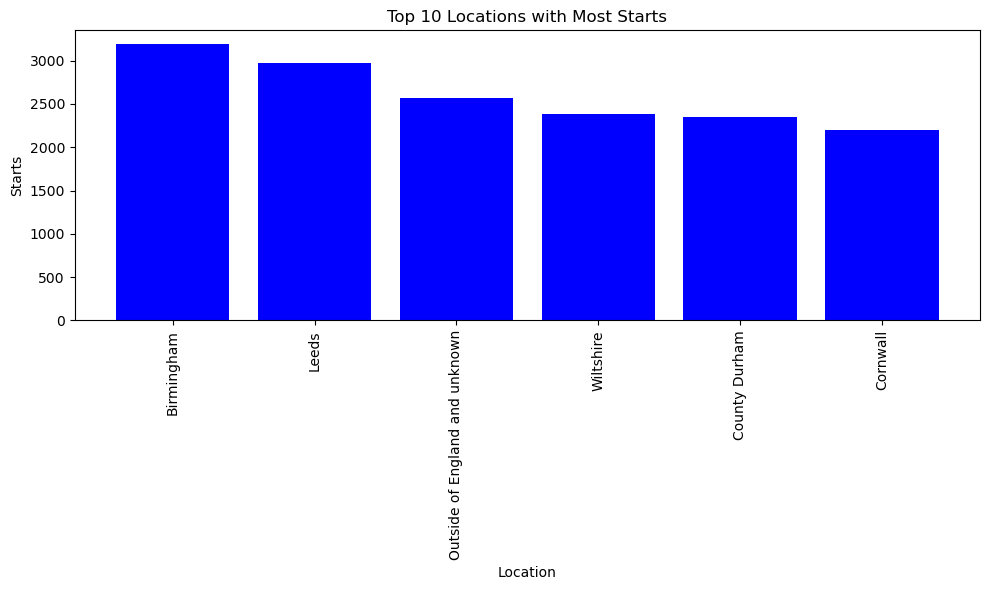

In [108]:
apprenticeshipsmap['starts'] = pd.to_numeric(apprenticeshipsmap['starts'], errors='coerce')

# Drop rows with NaN values in the 'starts' column
apprenticeshipsmap.dropna(subset=['starts'], inplace=True)

# Select top 10 locations with most starts
top_10_locations = apprenticeshipsmap.nlargest(10, 'starts')

# Create the bar chart using the top_10_locations DataFrame
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations["lad_name"], top_10_locations["starts"], color="blue")
plt.xlabel("Location")
plt.ylabel("Starts")
plt.title("Top 10 Locations with Most Starts")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()






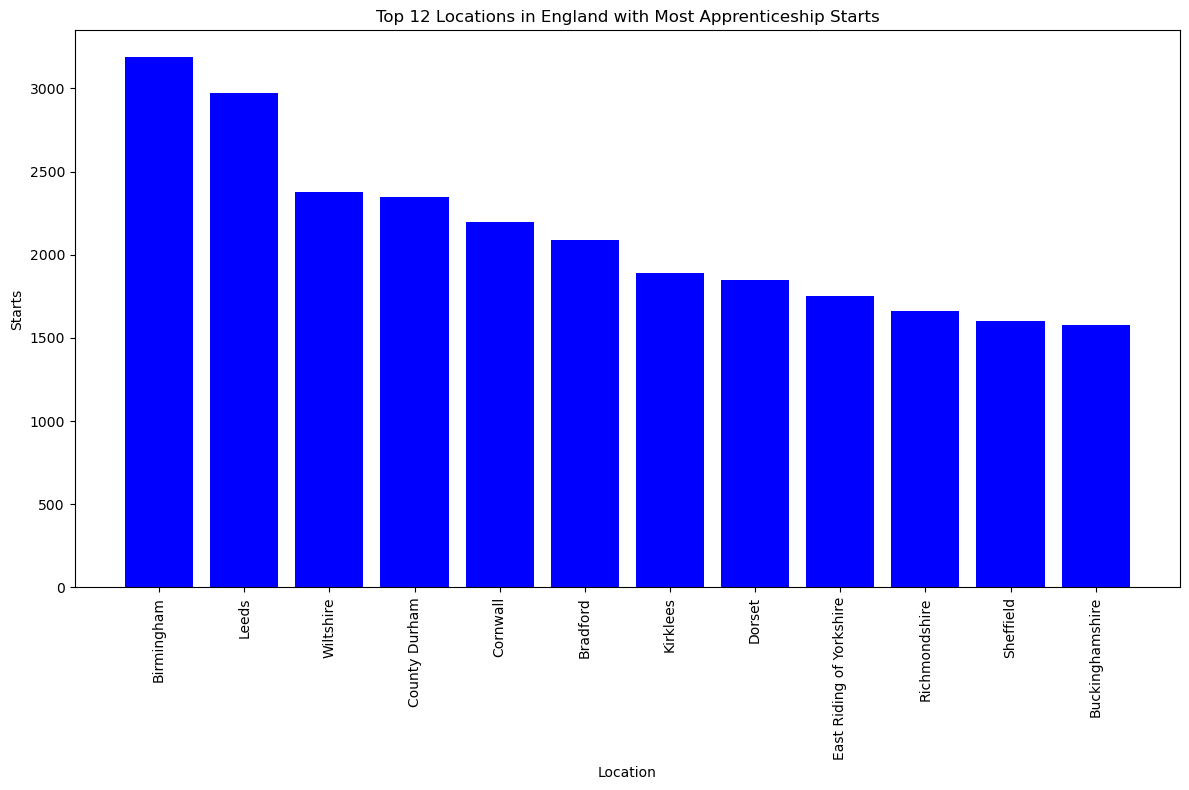

In [112]:
filtered_locations = apprenticeshipsmap[
    (apprenticeshipsmap['country_code'] == 'E92000001') &
    (apprenticeshipsmap['lad_name'] != 'Outside of England and unknown')  # Adjust 'Unknown' to match your actual value
]

# Select top 20 locations with most starts
top_20_locations = filtered_locations.nlargest(20, 'starts')

# Create the bar chart using the top_20_locations DataFrame
plt.figure(figsize=(12, 8))
plt.bar(top_20_locations["lad_name"], top_20_locations["starts"], color="blue")
plt.xlabel("Location")
plt.ylabel("Starts")
plt.title("Top 12 Locations in England with Most Apprenticeship Starts")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

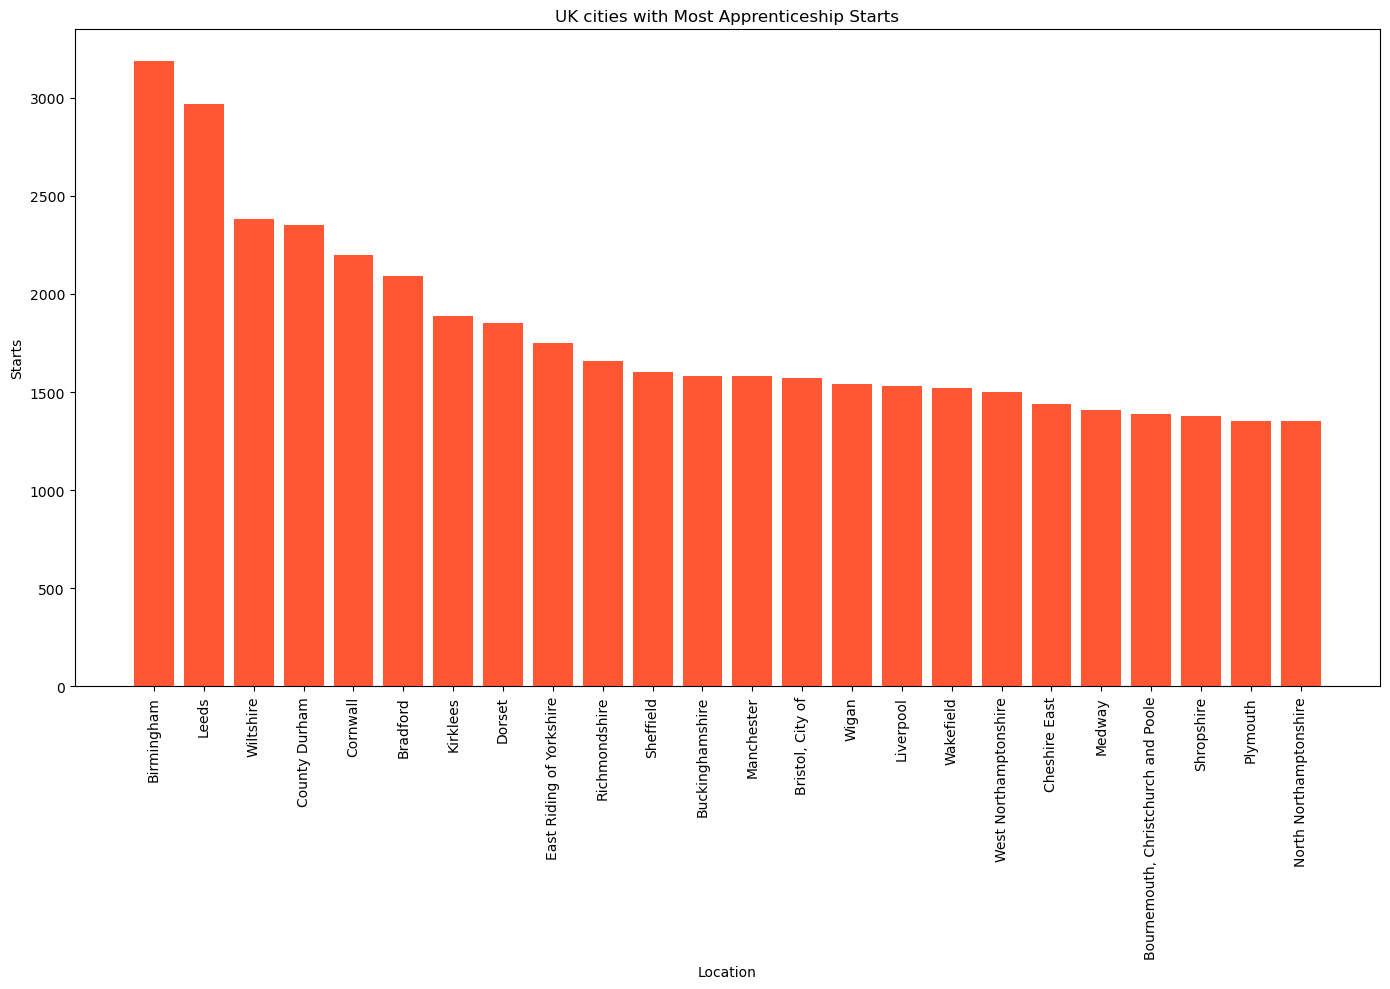

In [115]:
top_50_locations = filtered_locations.nlargest(50, 'starts')

# Create the bar chart using the top_50_locations DataFrame
plt.figure(figsize=(14, 10))
plt.bar(top_50_locations["lad_name"], top_50_locations["starts"], color="#FF5733")
plt.xlabel("Location")
plt.ylabel("Starts")
plt.title("UK cities with Most Apprenticeship Starts")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [116]:
apprenticeshipsmap.head(100)

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
115117,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000035,Leeds,Total,Total,Total,Total,2970.0,1030
275313,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E08000025,Birmingham,Total,Total,Total,Total,3190.0,1010
256687,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E06000054,Wiltshire,Total,Total,Total,Total,2380.0,1000
5009,202223,Academic year,Local authority district,E92000001,England,E12000009,South West,E06000054,Wiltshire,Total,Total,White,Total,2160.0,890
259126,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E08000035,Leeds,Total,Total,White,Total,2480.0,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,202223,Academic year,Local authority district,E92000001,England,E12000001,North East,E06000047,County Durham,Total,Male,Total,Total,1270.0,370
208697,202223,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E07000166,Richmondshire,"Health, Public Services and Care",Male,White,Intermediate Apprenticeship,1050.0,370
286092,202223,Academic year,Local authority district,E92000001,England,E12000004,East Midlands,E06000061,North Northamptonshire,Total,Total,Total,Total,1350.0,370
301554,202223,Academic year,Local authority district,E92000001,England,z,Outside of England and unknown,z,Outside of England and unknown,Total,Male,Total,Total,1530.0,370


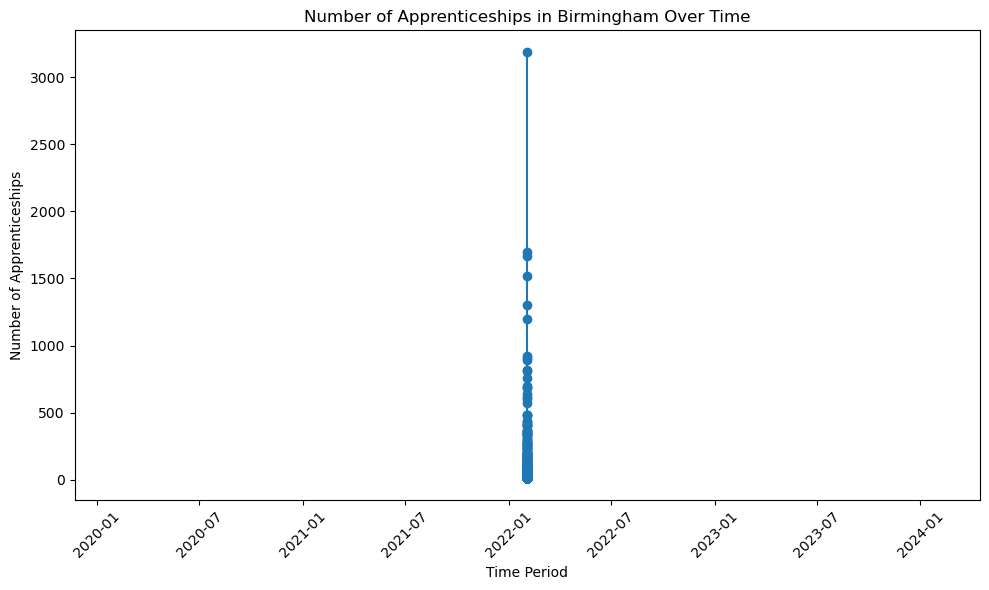

KeyError: 'starts'

<Figure size 1000x600 with 0 Axes>

KeyError: 'starts'

<Figure size 1000x600 with 0 Axes>

KeyError: 'starts_count'

<Figure size 1000x600 with 0 Axes>

NameError: name 'df' is not defined

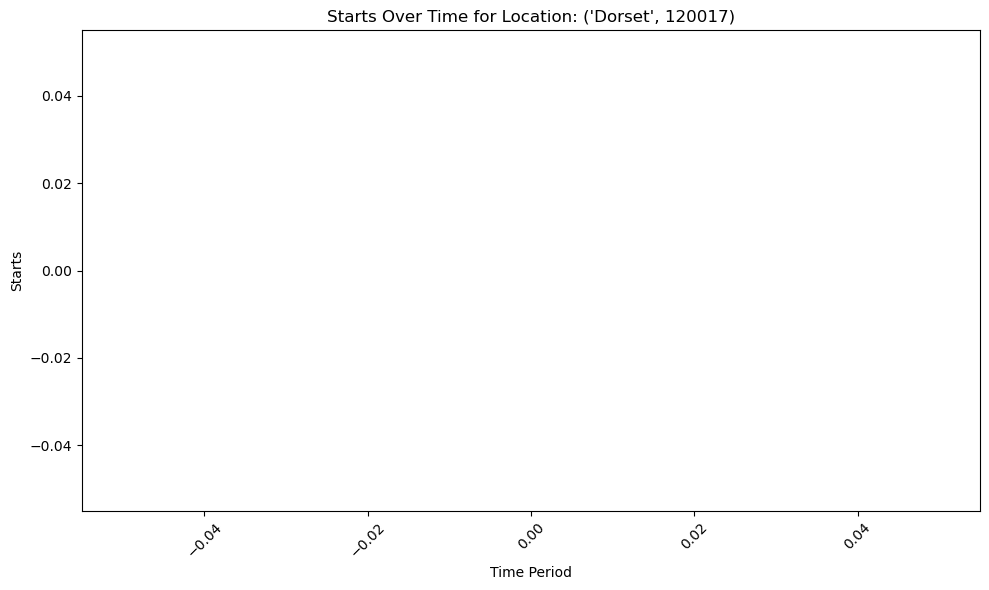

Empty DataFrame
Columns: [time_period, time_identifier, geographic_level, country_code, country_name, region_code, region_name, lad_code, lad_name, ssa_t1_desc, sex, ethnicity_major, apps_level, starts, achievements]
Index: []


Grouped Series:
lad_name        
Adur      323851      0.0
          267967     10.0
          271216   -100.0
          95148       0.0
          336262    -10.0
                    ...  
York      186689      0.0
          219635      0.0
          126124     10.0
          155979    -10.0
          162096      0.0
Name: starts, Length: 58296, dtype: float64
Location with Biggest Increase:
('Dorset', 120017)
